In [1]:
using DSP
using PyPlot
using SAC

┌ Info: Recompiling stale cache file /home/marvh/.julia/compiled/v0.7/DSP/OtML7.ji for DSP [717857b8-e6f2-59f4-9121-6e50c889abd2]
└ @ Base loading.jl:1185
┌ Info: Recompiling stale cache file /home/marvh/.julia/compiled/v0.7/SAC/Y5rcP.ji for SAC [efca3a79-a021-5bb4-b6cf-8c9de39e1246]
└ @ Base loading.jl:1185


In [3]:
dat = SAC.read_wild("Lahar-2018-07-150*.sac")

┌ Info: SAC.read: './Lahar-2018-07-1501.sac'
└ @ SAC /home/marvh/.julia/packages/SAC/mOBWB/src/io.jl:161
┌ Info: Data are little-endian; byteswapping
└ @ SAC /home/marvh/.julia/packages/SAC/mOBWB/src/types.jl:78
┌ Info: SAC.read: './Lahar-2018-07-1502.sac'
└ @ SAC /home/marvh/.julia/packages/SAC/mOBWB/src/io.jl:161
┌ Info: Data are little-endian; byteswapping
└ @ SAC /home/marvh/.julia/packages/SAC/mOBWB/src/types.jl:78
┌ Info: SAC.read: './Lahar-2018-07-1503.sac'
└ @ SAC /home/marvh/.julia/packages/SAC/mOBWB/src/io.jl:161
┌ Info: Data are little-endian; byteswapping
└ @ SAC /home/marvh/.julia/packages/SAC/mOBWB/src/types.jl:78
┌ Info: SAC.read: './Lahar-2018-07-1504.sac'
└ @ SAC /home/marvh/.julia/packages/SAC/mOBWB/src/io.jl:161
┌ Info: Data are little-endian; byteswapping
└ @ SAC /home/marvh/.julia/packages/SAC/mOBWB/src/types.jl:78


(SACtr[SAC.SACtr(delta=0.005, b=0.0, npts=1967745, kstnm=c0AVX   ), SAC.SACtr(delta=0.01, b=0.0, npts=1080000, kstnm=R9C82   ), SAC.SACtr(delta=0.01, b=0.0, npts=1080000, kstnm=MNGR    ), SAC.SACtr(delta=0.01, b=0.0, npts=1077315, kstnm=MNGR    )], ["./Lahar-2018-07-1501.sac", "./Lahar-2018-07-1502.sac", "./Lahar-2018-07-1503.sac", "./Lahar-2018-07-1504.sac"])

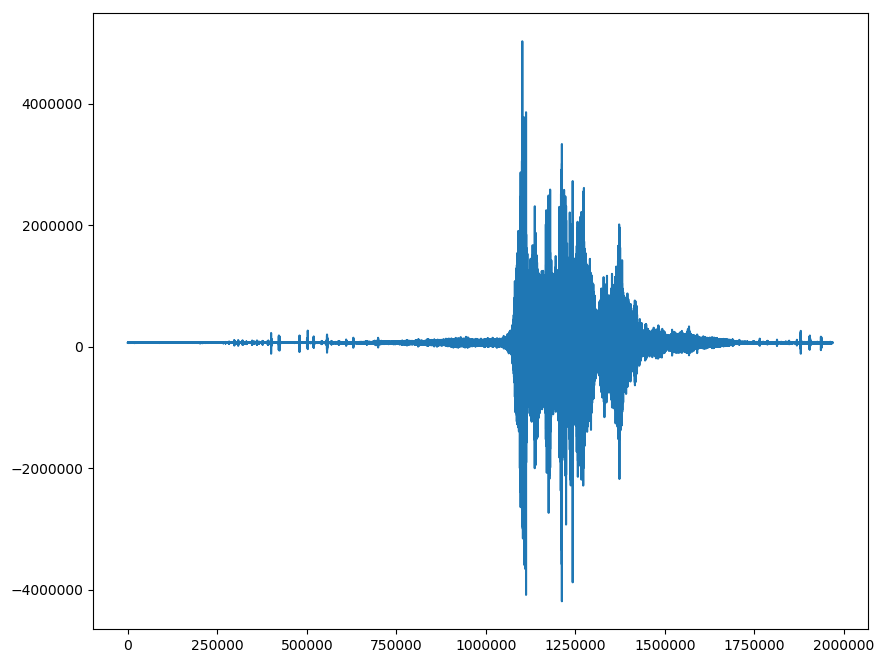

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f80b2ba6eb8>

In [7]:
fig = figure(figsize=(10,8))
plot(dat[1][1].t)

In [21]:
respon = Highpass(0.1,fs=200)
desig = Butterworth(4)
CuFil = filt(digitalfilter(respon,desig),dat[1][1].t);
CuMt = welch_pgram(CuFil,fs=200,2048);

In [22]:
respon = Highpass(0.1,fs=100)
desig = Butterworth(4)
RasFil = filt(digitalfilter(respon,desig),dat[1][2].t);
RasMt = welch_pgram(RasFil,fs=100,2048);

In [23]:
respon = Highpass(0.1,fs=100)
desig = Butterworth(4)
ResFil = filt(digitalfilter(respon,desig),dat[1][3].t);
ResMt = welch_pgram(ResFil,fs=100,2048);

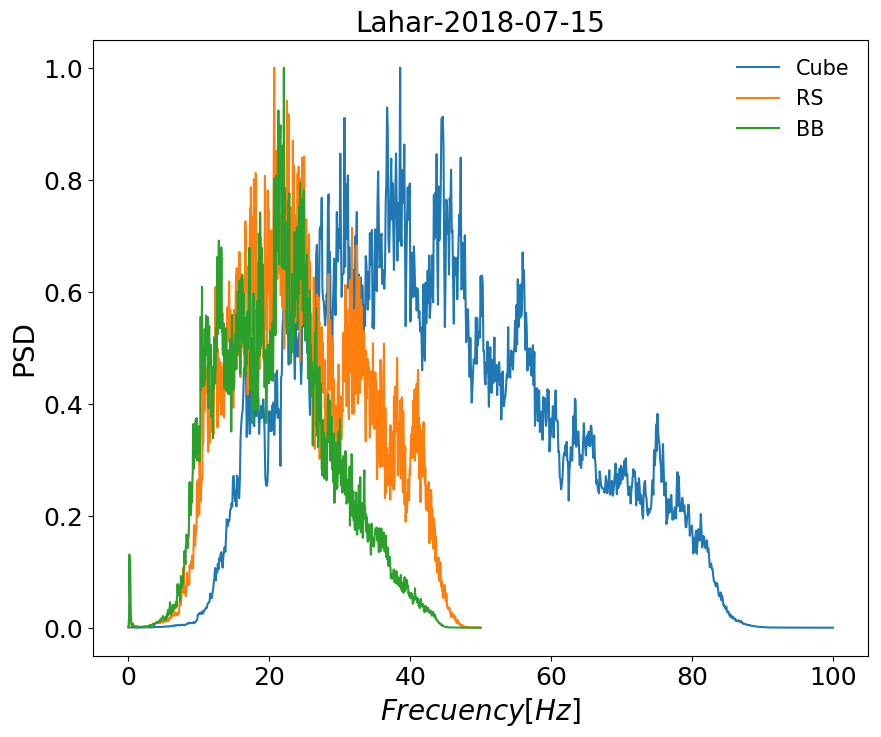

In [24]:
fig = figure(figsize=(10,8))
plot(CuMt.freq,CuMt.power/maximum(abs.(CuMt.power)),label="Cube")
plot(RasMt.freq,RasMt.power/maximum(abs.(RasMt.power)),label="RS")
plot(ResMt.freq,ResMt.power/maximum(abs.(ResMt.power)),label="BB")
ylabel("PSD",fontsize=20)
title("Lahar-2018-07-15",fontsize=20)
xlabel(L"Frecuency [Hz]",fontsize=20)
#legend(loc="best")
legend(loc="best",fontsize=15,frameon=false);
yticks(fontsize=18);
xticks(fontsize=18);

In [15]:
respon = Bandpass(0.5,49,fs=200)
desig = Butterworth(4)
RasFil = filt(digitalfilter(respon,desig),dat[1][2].t);
RasMt = welch_pgram(RasFil,fs=200,2048);